# Classification of Linearly Inseparable Data with **_Support Vector Machines_**

In [1]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

In [2]:
def get_data(n=1000, eff_size=3):
    """
    Generates data with 4 gaussians, whose means are `eff_size` apart.
    Points from every other gaussian would be classified as True
    """
    sub_n = n // 4
    x = np.hstack([
        np.random.normal(0, size=sub_n),
        np.random.normal(2 * eff_size, size=sub_n),
        np.random.normal(eff_size, size=sub_n),
        np.random.normal(3 * eff_size, size=sub_n),
    ]).reshape(-1, 1)
    y = np.hstack([
        np.zeros(sub_n * 2, bool),
        ~np.zeros(sub_n * 2, bool),
    ])
    return x, y


In [3]:
n = 1000
x, y = get_data(eff_size=4)

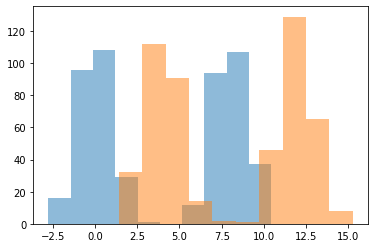

In [4]:
plt.hist(x[:n // 2], alpha=0.5)
plt.hist(x[n // 2:], alpha=0.5)
plt.show()

In [5]:
test_size = 1000
eff_size = 5
max_train_n = 50000
n_attempts = 100

x_test, y_test = get_data(n=test_size, eff_size=eff_size)

train_times = [] * max_train_n
classif_times = [] * max_train_n
accuracies = [] * max_train_n
ns = np.geomspace(4, max_train_n, n_attempts, dtype=int)
for n in ns:
    x_train, y_train = get_data(n, eff_size)

    t = time()
    model = SVC().fit(x_train, y_train)
    train_times.append(time() - t)

    t = time()
    y_pred = model.predict(x_test)
    classif_times.append(time() - t)

    accuracies.append(accuracy_score(y_test, y_pred))

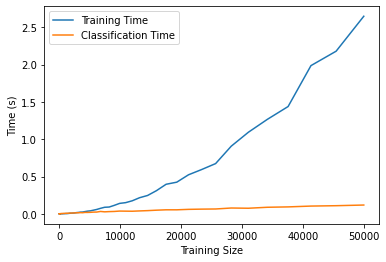

In [6]:
plt.plot(ns, train_times, label='Training Time')
plt.plot(ns, classif_times, label='Classification Time')
plt.xlabel('Training Size')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

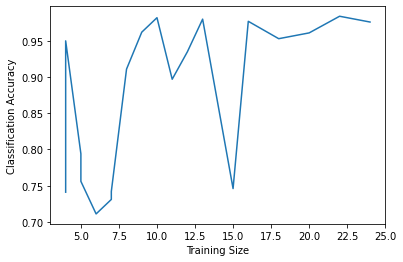

In [7]:
plt.plot(ns[:20], accuracies[:20])
plt.ylabel('Classification Accuracy')
plt.xlabel('Training Size')
plt.show()